# Employee salary prediction Project

Import all the python libraries required for the project.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

Read the dataset by uploading it to the google colab runtime using pandas.

In [ ]:
data = pd.read_csv('Employee_dataset.csv')    #Label dataset as data
data.head()   #Display first five rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()   #Get all the info of our dataset like the dtatype of each feature and count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data['MonthlyIncome'].head()   #Get the first 5 monthly salaries in our dataset

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

In [ ]:
data[['JobRole', 'MonthlyIncome']].head()  #Get first 5 peoples jobroles and monthly incomes

,JobRole,MonthlyIncome
0,Sales Executive,5993
1,Research Scientist,5130
2,Laboratory Technician,2090
3,Research Scientist,2909
4,Laboratory Technician,3468


In [ ]:
data.describe()  #Describe the statistical features of our data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
roles = data['JobRole'].unique()  #Get all the unique jobroles in our dataset.
print("Various jobroles in our dataset are: \n", roles)
print("\nNumber of Jobroles in our dataset are", len(roles))     #Get num of different roles

Various jobroles in our dataset are: 
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Number of Jobroles in our dataset are 9


**Correlation/Heatmap of 7 different attributes**

Correlation map usually indicates the stregnth of relationship among various different attributes. The more correlated they are the darker the colour of their intersecting cell is and vice versa.

A value close to 1 indicates high collinearity while a value closer to 0 indicates no or a little collinearity.

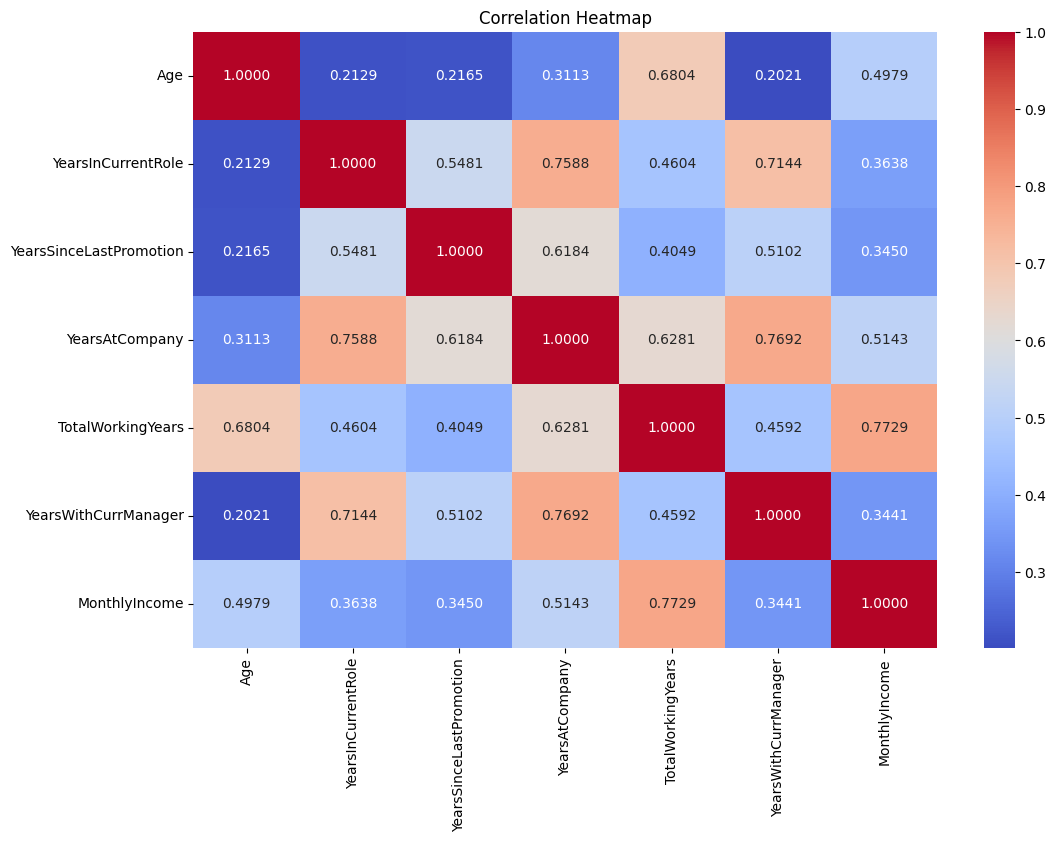

In [ ]:
col = ['Age','YearsInCurrentRole','YearsSinceLastPromotion','YearsAtCompany','TotalWorkingYears','YearsWithCurrManager','MonthlyIncome'] #Attribute selection
df_corr = data[col] #Take attributes into a new dataframe
cm = df_corr.corr() #Create a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".4f")   #use seaborn to make a heatmap
plt.title("Correlation Heatmap")
plt.show()

**Pairplots of 7 different attributes **

Pairplot also used to identify colleniarity among various features. THis plot is more clearer and provides insights than a heatmap.

Each single scatterplot shows the relation between variables and each histogram on the diagonal gives us the statistical distribution of variables.



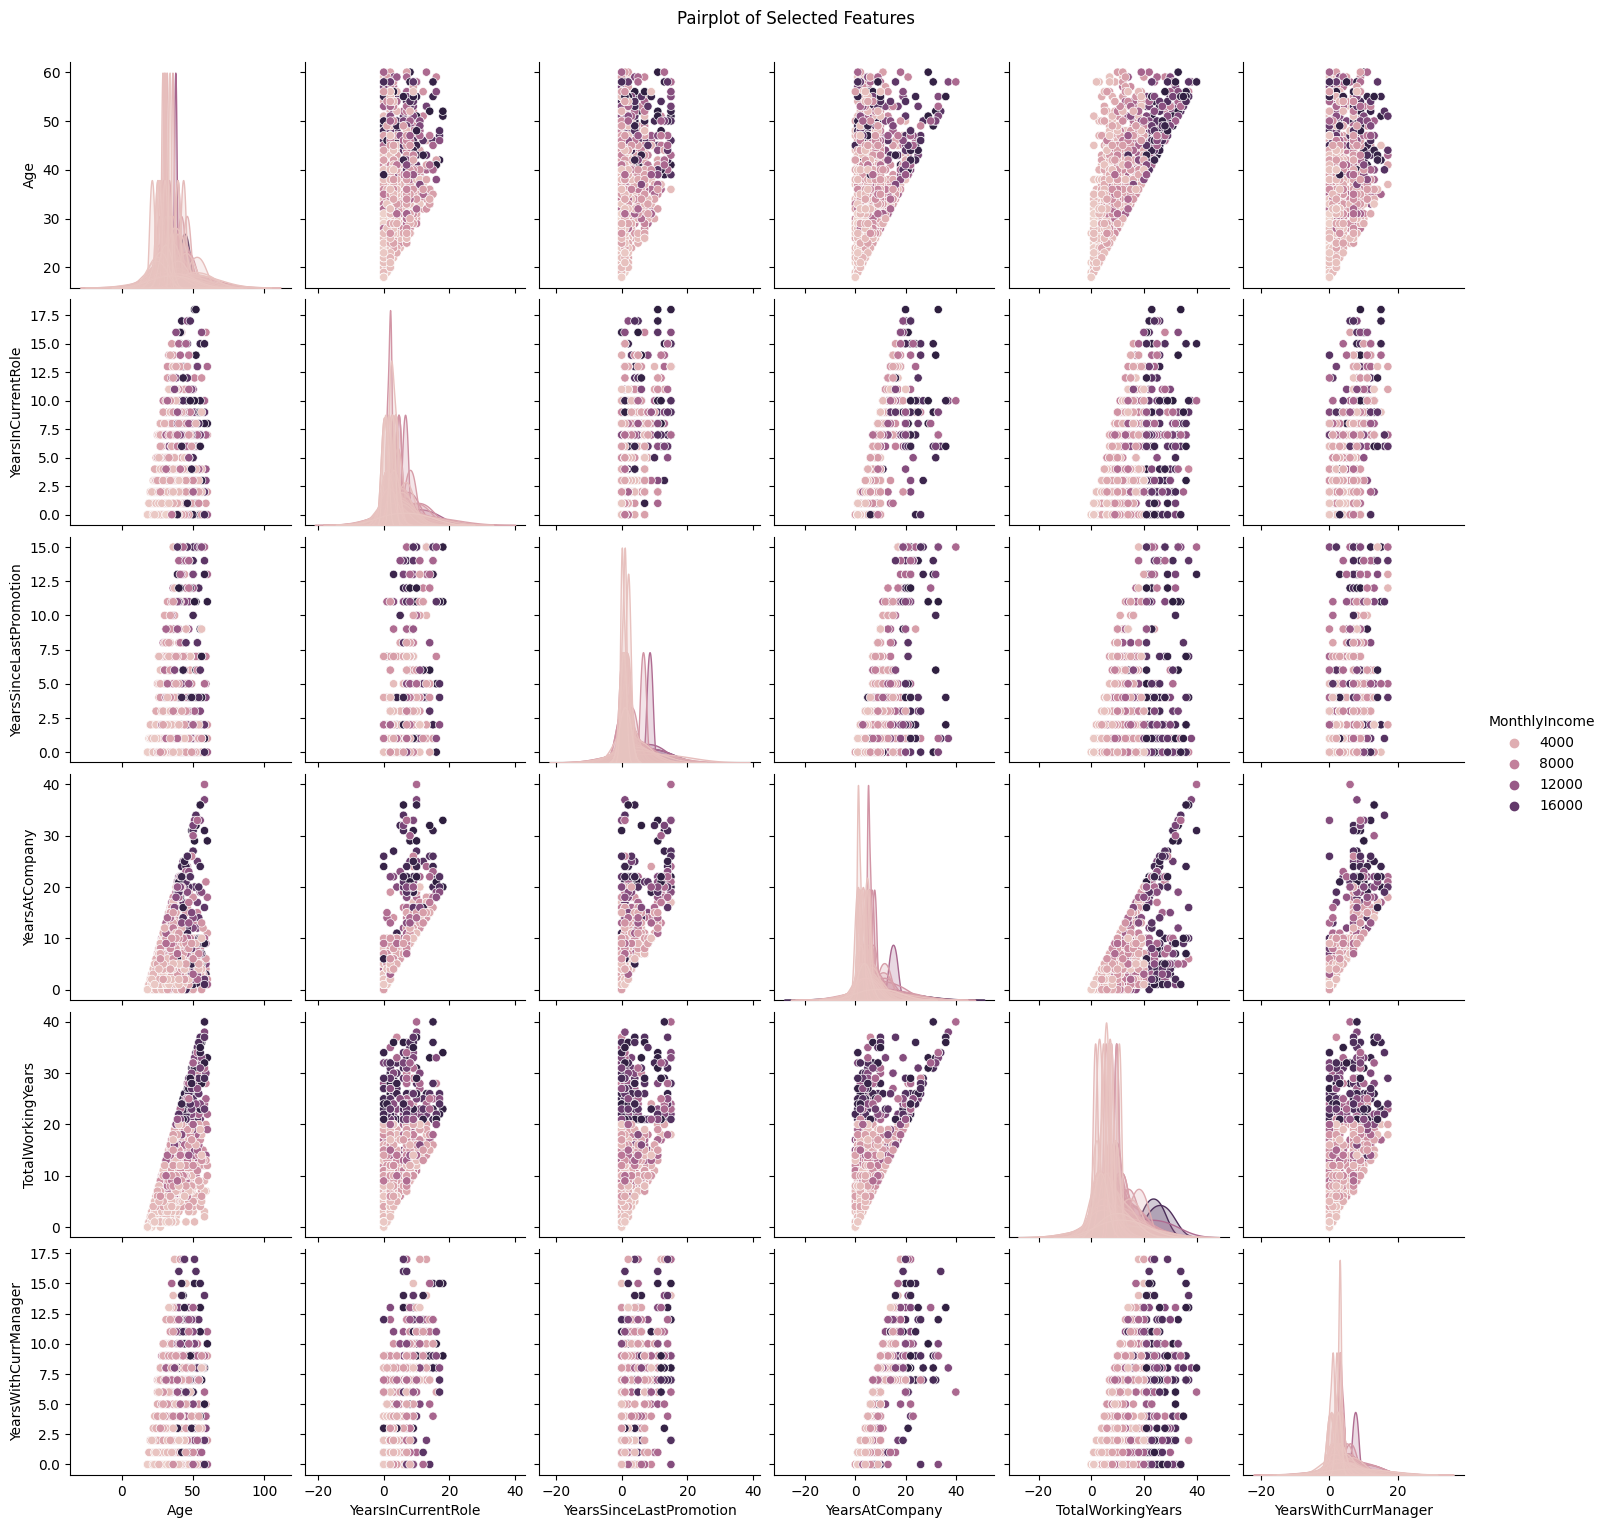

In [ ]:
col = ['Age','YearsInCurrentRole','YearsSinceLastPromotion','YearsAtCompany','TotalWorkingYears','YearsWithCurrManager','MonthlyIncome']
sns.pairplot(data[col], hue='MonthlyIncome', diag_kind='kde')  #create a pairplot.
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

**Boxplot of Attrition of employees based on their department.**

Boxplot gives us the distribution of data. The quarter1, quarter3 and IQR ranges are given by boxplot. Median is marked by a line in the box.


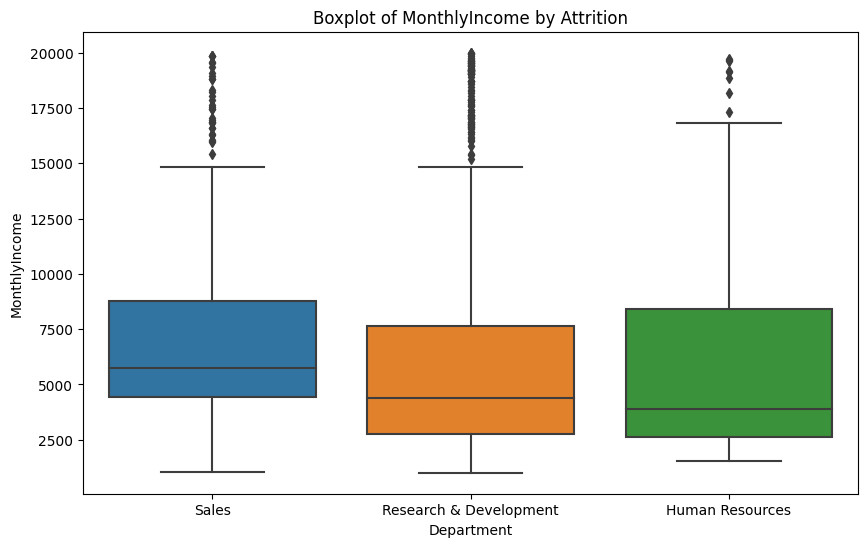

In [ ]:
plt.figure(figsize=(10, 6))  #size of boxplot
sns.boxplot(x='Department', y='MonthlyIncome', data=data) #create a boxplot
plt.title("Boxplot of MonthlyIncome by Attrition") #Title of the plot.
plt.show()

**Countplot of Jobroles with their education levels.**

Countplot is basically used to get the total count of a feature and hue is used to Differentiate plot based on other attribute.

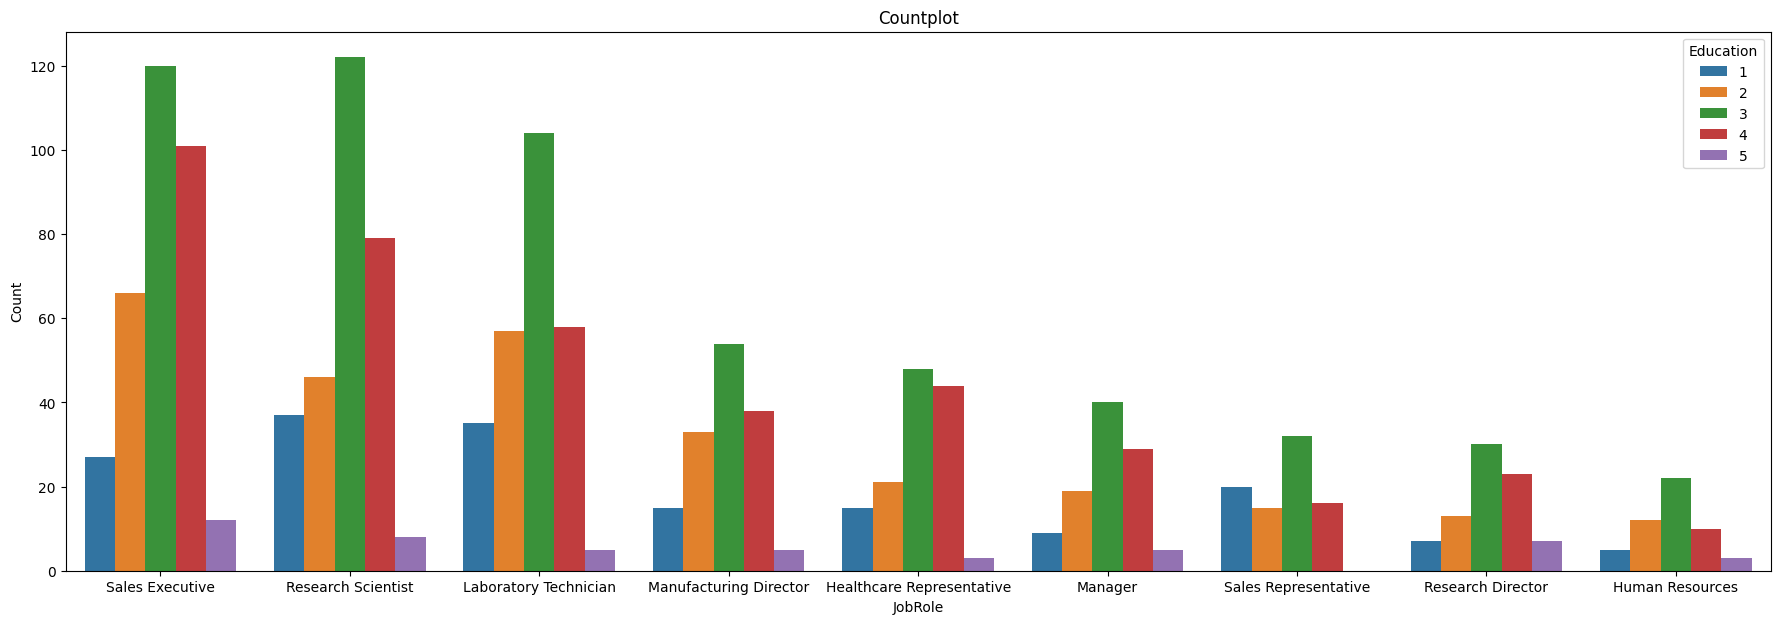

In [ ]:
plt.figure(figsize=(22, 7))
sns.countplot(x='JobRole', hue='Education', data=data)  #Define x values and hue for boxplot.
plt.title("Countplot") #Define title and x,y labels for the plot
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.show()

**Pairplot of three different attributes**

A paiplot is done for monthlyincome and yearsatcompany with colors marked by jobrole attribute.

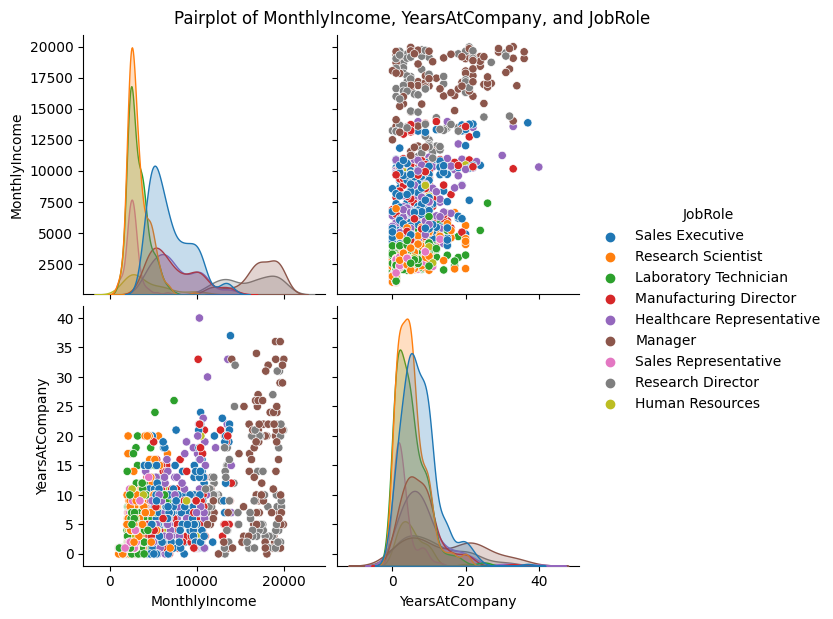

In [ ]:
col = ['MonthlyIncome', 'YearsAtCompany', 'JobRole']
df = data[col] #A subset of columns to create pairplot

# make a pairplot
sns.pairplot(df, hue='JobRole', height=3)
#The dots are marked based on jobrole in the plot.
plt.suptitle("Pairplot of MonthlyIncome, YearsAtCompany, and JobRole", y=1.02)
plt.show()

**Converting categorical columns to numeric to train the model using label encoder.**

In [ ]:
df = data[['Age','TotalWorkingYears','JobRole','JobLevel', 'MonthlyIncome']]
label_encoder = LabelEncoder()  #create label encoder object.

# Jobrole is converted to numeric below.
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df

,Age,TotalWorkingYears,JobRole,JobLevel,MonthlyIncome
0,41,8,7,2,5993
1,49,10,6,2,5130
2,37,7,2,1,2090
3,33,8,6,1,2909
4,27,6,2,1,3468
...,...,...,...,...,...
1465,36,17,2,2,2571
1466,39,9,0,3,9991
1467,27,6,4,2,6142
1468,49,17,7,2,5390


We can see the numbers assigned by the label encoder to each jobrole below.

In [ ]:
job_role_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for job_role, encoded_number in job_role_mapping.items():
    print(f"{job_role}: {encoded_number}")

Healthcare Representative: 0
Human Resources: 1
Laboratory Technician: 2
Manager: 3
Manufacturing Director: 4
Research Director: 5
Research Scientist: 6
Sales Executive: 7
Sales Representative: 8


**LINEAR REGRESSION MODEL**

In [ ]:
X = df.drop('MonthlyIncome', axis=1)  #Take all columns of df except monthly income to x
y = df['MonthlyIncome']   #Take monthly income to y

In [ ]:
# Make the training and testing sets from the x and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()  #create a linear regression model
lr_model.fit(X_train, y_train)  #Train the model
print(lr_model.coef_)    #Get coefficients values
print(lr_model.intercept_)   #Get intercept value

[  -8.16226141   50.59232404   -9.23888032 3814.57611991]
-1574.5242122338705


Find error values and plot a scatter plot between actual and predicted values.

The Root Mean Squared Error value is: 1517.8288473926373
The R-squared Score is: 0.8945888203249073



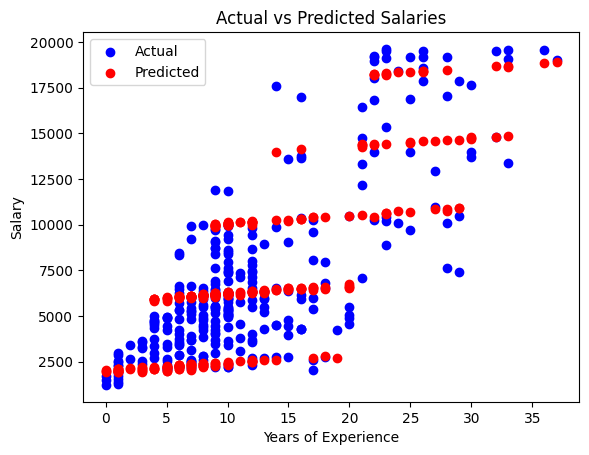

In [ ]:
y_pred = lr_model.predict(X_test)  # Generate predicted values of y using test values of x.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  #RMSE error value
r2 = r2_score(y_test, y_pred)  # r-squared score value
#Print values
print(f"The Root Mean Squared Error value is: {rmse}")
print(f"The R-squared Score is: {r2}\n")

#plot the values in a scatter plot.
plt.scatter(X_test['TotalWorkingYears'], y_test, color='blue', label='Actual')
plt.scatter(X_test['TotalWorkingYears'], y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Actual vs Predicted Salaries')
plt.show()

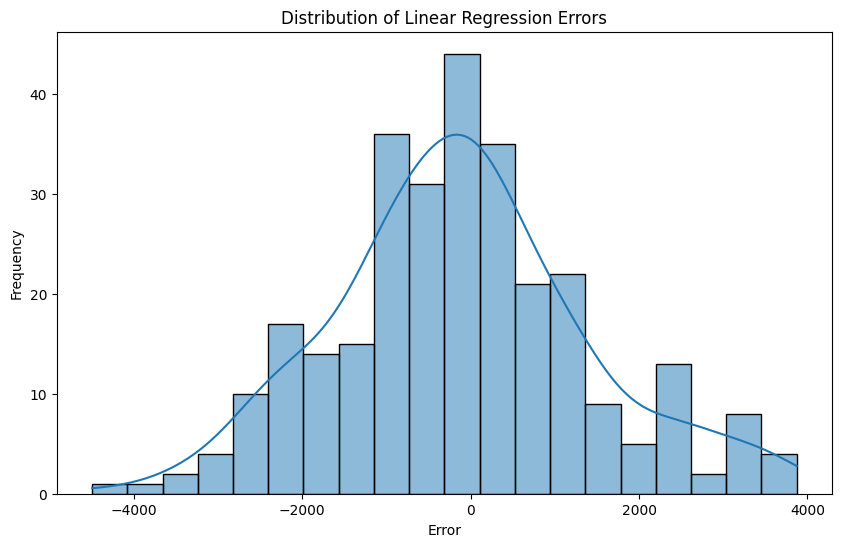

Linear Regression Model MSE: 2303804.409977262
Linear Regression Model MAE: 1168.1898526073667
Linear Regression Model R-squared: 0.8945888203249073


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate error values
linear_error = y_test - y_pred

# Visualize the distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(linear_error, bins=20, kde=True)
plt.title("Distribution of Linear Regression Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred)

# Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred)

# R-squared
r2_linear = r2_score(y_test, y_pred)

print(f"Linear Regression Model MSE: {mse_linear}")
print(f"Linear Regression Model MAE: {mae_linear}")
print(f"Linear Regression Model R-squared: {r2_linear}")

**GAUSSIAN MIXTURE MODEL**

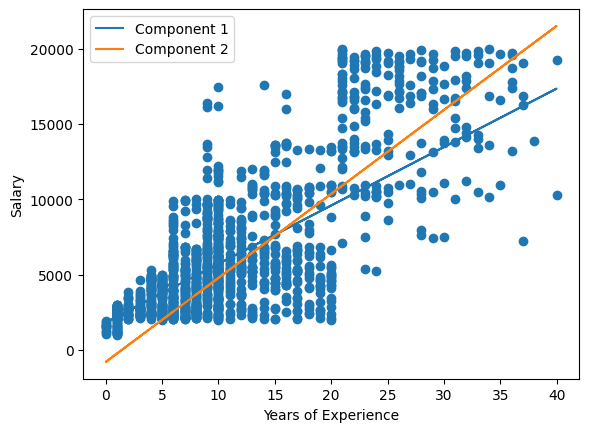

In [ ]:
# creating a gaussian mixture object with 2 components
gmm = GaussianMixture(n_components=2)

# Train the gmm model with totalworkingyears
gmm.fit(data[['TotalWorkingYears']])

# Predict values and store into labels
labels = gmm.predict(data[['TotalWorkingYears']])

# create 2 models of linear regression
model1 = LinearRegression()
model2 = LinearRegression()

# Reshape data into 2D array
X_reshape = data['TotalWorkingYears'].values.reshape(-1, 1)

#Train both models
model1.fit(X_reshape[labels == 0], data.loc[labels == 0, 'MonthlyIncome'])
model2.fit(X_reshape[labels == 1], data.loc[labels == 1, 'MonthlyIncome'])

# Plot the regression lines on scatterplot of data
plt.scatter(data['TotalWorkingYears'], data['MonthlyIncome'])
plt.plot(data['TotalWorkingYears'], model1.predict(X_reshape), label='Component 1')
plt.plot(data['TotalWorkingYears'], model2.predict(X_reshape), label='Component 2')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

**RANDOM FOREST REGRESSOR MODEL**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X = data.drop('MonthlyIncome', axis=1)
y = data['MonthlyIncome']

# categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Creating a ColumnTransformer for preprocessing
prepr = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X.columns if col not in categorical_cols]),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = prepr.fit_transform(X_train)
X_test = prepr.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_regressor.predict(X_test)

# Print best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 1206334.114593432


Mean Squared Error: 1206334.114593432
R-squared: 0.9448038637521068


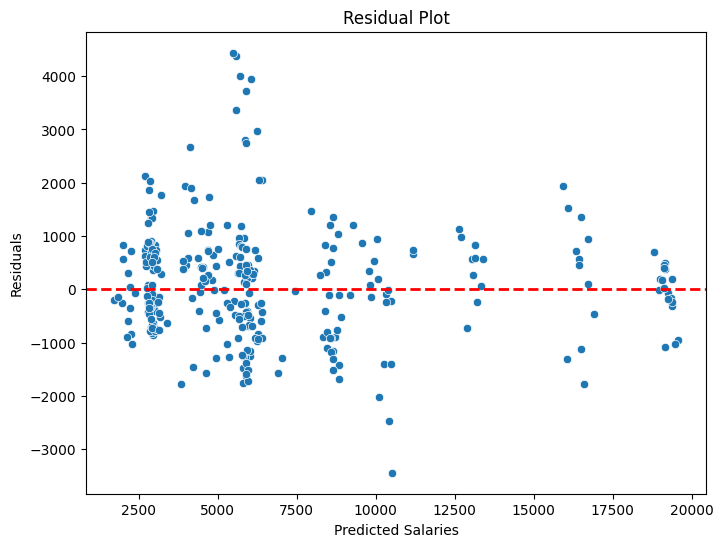

In [ ]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Salaries')
plt.ylabel('Residuals')
plt.show()

**GRADIENT BOOSTING REGRESSOR MODEL**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an object of gradientboostingregressor
gb_reg = GradientBoostingRegressor()

X = df.drop('MonthlyIncome', axis=1)
y = df['MonthlyIncome']

# Make the training and testing sets from the x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gb_reg.fit(X_train, y_train)

# Predicting values
y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MSE: {mse_gb}, \nMAE: {mae_gb}, \nR-squared: {r2_gb}")

MSE: 1300098.8262953742, 
MAE: 838.0666692249112, 
R-squared: 0.9405136345861274


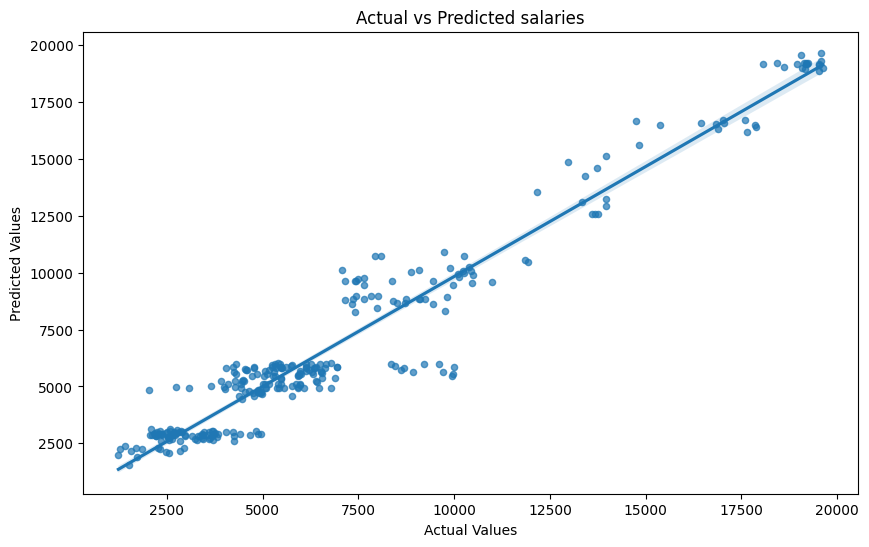

In [ ]:
# Plotting the predicted vs actual values with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_gb, scatter_kws={'s': 20, 'alpha':0.7})
plt.title("Actual vs Predicted salaries")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

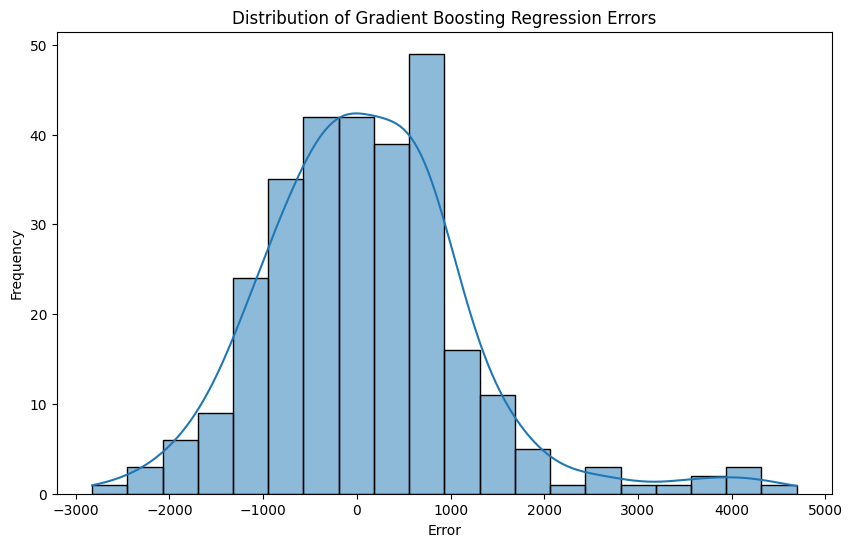

In [ ]:
# Calculating the error metrics for Gradient Boosting
gb_error = y_test - y_pred_gb

# distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(gb_error, bins=20, kde=True)
plt.title("Distribution of Gradient Boosting Regression Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

**BAGGING REGRESSOR MODEL**

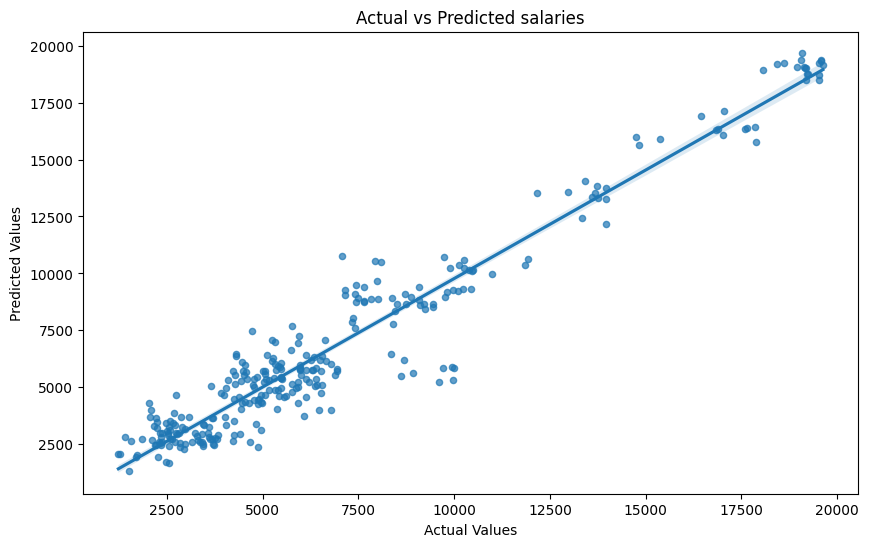

Bagging Regressor Mean Squared Error: 1370070.547049712
Bagging Regressor Mean Absolute Error: 877.0072105164298
Bagging Regressor R-squared Score: 0.9373120600094541


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Create a decsion tree regressor object
base_model = DecisionTreeRegressor()

# Creating a bagging model
bagging_model = BaggingRegressor(base_model, n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_bagging, scatter_kws={'s': 20, 'alpha': 0.7})
plt.title("Actual vs Predicted salaries")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Calculate metrics
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Print metrics and runtime
print(f"Bagging Regressor Mean Squared Error: {mse_bagging}")
print(f"Bagging Regressor Mean Absolute Error: {mae_bagging}")
print(f"Bagging Regressor R-squared Score: {r2_bagging}")